In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, SGDRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor,AdaBoostRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
 
from tpot import TPOTRegressor
    
    
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [2]:
import zipfile
sample_zip = zipfile.ZipFile('/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip')
train_zip = zipfile.ZipFile('/kaggle/input/nyc-taxi-trip-duration/train.zip')
test_zip = zipfile.ZipFile('/kaggle/input/nyc-taxi-trip-duration/test.zip')

train_df = pd.read_csv(train_zip.open("train.csv"))
test_df = pd.read_csv(test_zip.open("test.csv"))
sample_df = pd.read_csv(sample_zip.open("sample_submission.csv"))

In [3]:
# Training score 0.5685579390421797

In [4]:
train = train_df.copy()
test = test_df.copy()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [7]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [8]:
sample_df.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


In [9]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [10]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [11]:
train_id = train[["id"]]
test_id = test[["id"]]

In [12]:
train.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455


In [13]:
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"])

In [14]:
train["pickup_datetime"].min(), train["pickup_datetime"].max()

(Timestamp('2016-01-01 00:00:17'), Timestamp('2016-06-30 23:59:39'))

In [15]:
train["pickup_datetime"].max() - train["pickup_datetime"].min()

Timedelta('181 days 23:59:22')

In [16]:
train["month"] = train["pickup_datetime"].dt.month
train["day"] = train["pickup_datetime"].dt.day
train["hour"] = train["pickup_datetime"].dt.hour
train["minute"] = train["pickup_datetime"].dt.minute
train["second"] = train["pickup_datetime"].dt.second

In [17]:
# plt.figure(figsize=(12, 4))
# train.groupby(train["hour"])["trip_duration"].mean().plot(kind='bar', rot=0)

# plt.xlabel("Hour of the day")
# plt.ylabel("Duration")
# plt.show()

In [18]:
# plt.figure(figsize=(16,12))
# sns.scatterplot(train, x="pickup_latitude", y="pickup_longitude",style="store_and_fwd_flag")
# plt.show()

In [19]:
 # plt.figure(figsize=(16,12))
# sns.scatterplot(train, x="dropoff_latitude", y="dropoff_longitude",style="store_and_fwd_flag")
# plt.show()

In [20]:
# plt.figure(figsize=(16,12))
# sns.boxplot(train.drop(columns=["id","trip_duration"]))
# plt.show()

In [21]:
train["store_and_fwd_flag"].value_counts()

store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64

### Data Cleaning

In [22]:
def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the DataFrame to remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered[column]

In [23]:
# train[i] = remove_outliers(train, i)

NameError: name 'i' is not defined

In [24]:
for i in ["pickup_longitude","pickup_latitude", "dropoff_longitude", "dropoff_latitude"]:
    train[i] = remove_outliers(train, i)

In [25]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day,hour,minute,second
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,14,17,24,55
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,12,0,43,35
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,19,11,35,24
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,6,19,32,31
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,26,13,30,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,8,13,31,4
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,10,7,35,15
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,22,6,57,41
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1,5,15,56,26


In [26]:
# plt.figure(figsize=(16,12))
# sns.scatterplot(train, x="pickup_latitude", y="pickup_longitude",style="store_and_fwd_flag")
# plt.show()

In [27]:
# plt.figure(figsize=(16,12))
# sns.scatterplot(train, x="dropoff_latitude", y="dropoff_longitude",style="store_and_fwd_flag")
# plt.show()

In [28]:
import pandas as pd
import math

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 

    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km

In [29]:
# Apply the Haversine function to each row
train['distance'] = train.apply(lambda row: haversine(row['pickup_longitude'],
                                                      row['pickup_latitude'],
                                                      row['dropoff_longitude'],
                                                      row['dropoff_latitude']), axis=1)

In [30]:
encoder = LabelEncoder()

train["store_and_fwd_flag"] = encoder.fit_transform(train["store_and_fwd_flag"])

In [31]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day,hour,minute,second,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,3,14,17,24,55,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,12,0,43,35,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,19,11,35,24,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,4,6,19,32,31,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,3,26,13,30,55,1.188588


In [32]:
train = train.set_index("id")
train.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day,hour,minute,second,distance
id,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,3,14,17,24,55,1.498521
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,12,0,43,35,1.805507
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,19,11,35,24,6.385098
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,4,6,19,32,31,1.485498
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,3,26,13,30,55,1.188588


In [33]:
train = train.drop(columns=["dropoff_datetime",
                            'pickup_longitude', 'pickup_latitude',
                            'dropoff_longitude', 'dropoff_latitude'])

In [34]:
train

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,month,day,hour,minute,second,distance
id,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,1,0,455,3,14,17,24,55,1.498521
id2377394,1,2016-06-12 00:43:35,1,0,663,6,12,0,43,35,1.805507
id3858529,2,2016-01-19 11:35:24,1,0,2124,1,19,11,35,24,6.385098
id3504673,2,2016-04-06 19:32:31,1,0,429,4,6,19,32,31,1.485498
id2181028,2,2016-03-26 13:30:55,1,0,435,3,26,13,30,55,1.188588
...,...,...,...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08 13:31:04,4,0,778,4,8,13,31,4,1.225080
id1049543,1,2016-01-10 07:35:15,1,0,655,1,10,7,35,15,6.049836
id2304944,2,2016-04-22 06:57:41,1,0,764,4,22,6,57,41,7.824606


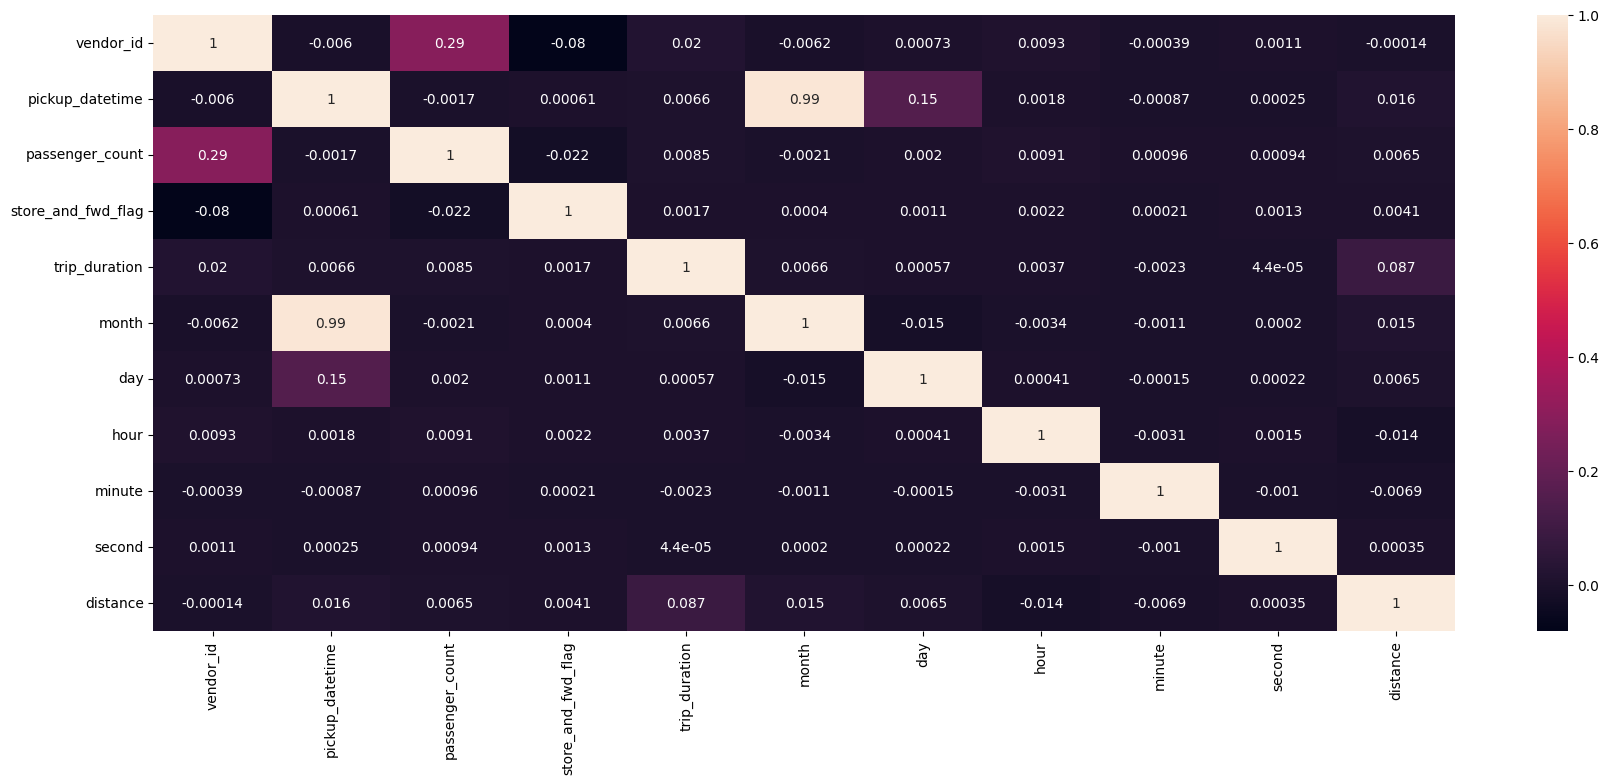

In [35]:
plt.figure(figsize=(21,8))
sns.heatmap(train.corr(), annot=True, )
plt.show()

In [37]:
correlation = train['trip_duration'].corr(train['distance']*1000)

In [38]:
correlation

0.08713820664352369

### Appling on test

In [39]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])

In [40]:
test["month"] = test["pickup_datetime"].dt.month
test["day"] = test["pickup_datetime"].dt.day
test["hour"] = test["pickup_datetime"].dt.hour
test["minute"] = test["pickup_datetime"].dt.minute
test["second"] = test["pickup_datetime"].dt.second

In [41]:
test['distance'] = test.apply(lambda row: haversine(row['pickup_longitude'],
                                                      row['pickup_latitude'],
                                                      row['dropoff_longitude'],
                                                      row['dropoff_latitude']), axis=1)

In [42]:
test["store_and_fwd_flag"] = encoder.transform(test["store_and_fwd_flag"])

In [43]:
test = test.set_index("id")

In [44]:
test = test.drop(columns=['pickup_longitude', 'pickup_latitude',
                            'dropoff_longitude', 'dropoff_latitude'])

In [45]:
test

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,month,day,hour,minute,second,distance
id,,,,,,,,,,
id3004672,1,2016-06-30 23:59:58,1,0,6,30,23,59,58,2.746426
id3505355,1,2016-06-30 23:59:53,1,0,6,30,23,59,53,2.759239
id1217141,1,2016-06-30 23:59:47,1,0,6,30,23,59,47,1.306155
id2150126,2,2016-06-30 23:59:41,1,0,6,30,23,59,41,5.269088
id1598245,1,2016-06-30 23:59:33,1,0,6,30,23,59,33,0.960842
...,...,...,...,...,...,...,...,...,...,...
id3008929,1,2016-01-01 00:02:52,1,0,1,1,0,2,52,0.967438
id3700764,1,2016-01-01 00:01:52,1,0,1,1,0,1,52,6.196343
id2568735,1,2016-01-01 00:01:24,2,0,1,1,0,1,24,8.153719


In [46]:
train = train.drop(columns=['pickup_datetime'])
test = test.drop(columns=['pickup_datetime'])

In [47]:
train = train.dropna()

### Cross Valdating

In [48]:
X = train.drop(columns="trip_duration")
y = train[["trip_duration"]]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
linear = LinearRegression()

linear.fit(X_train,y_train)
print(f"Training score {linear.score(X_train,y_train)}")
y_pred = linear.predict(X_test)
print(f"R2: {r2_score(y_test,y_pred)}")

Training score 0.012233324897421016
R2: 0.003603103726431356


In [51]:
cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_test)
print(f"Training score {cat_model.score(X_train,y_train)}")
print(f"R2: {r2_score(y_test,y_pred)}")

Learning rate set to 0.122222
0:	learn: 3079.1291147	total: 170ms	remaining: 2m 49s
1:	learn: 3075.7526229	total: 258ms	remaining: 2m 8s
2:	learn: 3073.0028797	total: 338ms	remaining: 1m 52s
3:	learn: 3070.7493965	total: 424ms	remaining: 1m 45s
4:	learn: 3069.0319533	total: 508ms	remaining: 1m 41s
5:	learn: 3067.6972827	total: 590ms	remaining: 1m 37s
6:	learn: 3066.6502562	total: 674ms	remaining: 1m 35s
7:	learn: 3065.7661168	total: 756ms	remaining: 1m 33s
8:	learn: 3065.0306192	total: 843ms	remaining: 1m 32s
9:	learn: 3064.4968071	total: 929ms	remaining: 1m 31s
10:	learn: 3064.0941783	total: 1.01s	remaining: 1m 31s
11:	learn: 3063.7464559	total: 1.09s	remaining: 1m 30s
12:	learn: 3063.4168682	total: 1.18s	remaining: 1m 29s
13:	learn: 3063.1062261	total: 1.26s	remaining: 1m 28s
14:	learn: 3062.8557174	total: 1.33s	remaining: 1m 27s
15:	learn: 3062.7029196	total: 1.42s	remaining: 1m 27s
16:	learn: 3062.5601265	total: 1.49s	remaining: 1m 26s
17:	learn: 3062.4025977	total: 1.57s	remaining

In [52]:
xg_model = XGBRegressor()
xg_model.fit(X_train, y_train)

y_pred = xg_model.predict(X_test)
print(f"Training score {xg_model.score(X_train,y_train)}")
print(f"R2: {r2_score(y_test,y_pred)}")

Training score 0.054087689969709585
R2: 0.0014551769446842222


In [53]:
LG_model = LGBMRegressor()
LG_model.fit(X_train, y_train)

y_pred = LG_model.predict(X_test)
print(f"Training score {LG_model.score(X_train,y_train)}")
print(f"R2: {r2_score(y_test,y_pred)}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 450
[LightGBM] [Info] Number of data points in the train set: 1014225, number of used features: 9
[LightGBM] [Info] Start training from score 815.554324
Training score 0.030112129020433476
R2: 0.0037924178540763576


### OG Test

In [54]:
xg_model = XGBRegressor()
xg_model.fit(X, y)

y_pred = xg_model.predict(test)
print(f"Training score {xg_model.score(X,y)}")

Training score 0.122818250837056


In [239]:
output = test_id

In [240]:
len(output)

625134

In [241]:
len(y_pred)

625134

In [242]:
output["trip_duration"] = pd.DataFrame(y_pred)

In [243]:
output = output.set_index("id")

In [244]:
output.to_csv("trip_duration_XG.csv")

In [245]:
output

,trip_duration
id,
id3004672,288.040253
id3505355,650.092651
id1217141,416.293945
id2150126,958.190125
id1598245,199.557297
...,...
id3008929,12.400118
id3700764,1596.184937
id2568735,2019.055298
